## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

### Explorando uma base de dados

Nesta atividade prática iremos explorar a seguinte base de dados **_Forest Cover Type_**

1. Obtenha esta base de dados no seguinte link: https://www.kaggle.com/uciml/forest-cover-type-dataset/download
2. Consulte a documentação oficial da base de dados: https://archive.ics.uci.edu/ml/datasets/covertype
3. **Responda**:  
  3.1 O que é cada exemplo na base de dados?  
  3.2 Em que ano ela foi obtida?  
  3.3 Quem foram os responsáveis pela criação desta base de dados?  

### 1. O que é cada exemplo na base de dados?

O tipo real de cobertura florestal para uma determinada observação (célula de 30 x 30 metros) 

###  2. Em que ano ela foi obtida?

Os dados foram obtidos no ano de 1998 

### 3. Quem foram os responsáveis pela criação desta base de dados?
Os responsaveis pela criacao da base de dados são 3, sendo eles listados a seguir com suas respectivas informações adicionais
* Jock A. Blackard COORDENADOR DO GIS USFS - Forest Inventory & Analysis Rocky Mountain Research Station
* Dr. Denis J. Dean Professor Program in Geography and Geospatial Sciences School of Economic, Political and Policy Sciences
* Dr. Charles W. Anderson Associate Professor Department of Computer Science Colorado State University

### Manipulando a base de dados

1. Abra a base de dados com o pandas
2. Imprima os 10 primeiros exemplos pertencentes à esta base
3. Imprima os 10 últimos exemplos pertencentes à esta base
4. Quantos exemplos esta base de dados possui?
5. Quais são os atributos que a base de dados possui e quais seus tipos?
6. Há algum dado faltante na base?
7. De acordo com a documentação da base de dados, qual o significado dos atributos do tipo "Soil Type"?  
  7.1 Este atributo é quantitativo ou qualitativo?  
  7.2 Qual o tipo de codificação utilizada para denotar este atributo? Consulte a seguinte referência:  
  * https://pbpython.com/categorical-encoding.html

In [16]:
## Reservado para a importação de bibliotecas

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py
import plotly.graph_objects as go
import math
from prettytable import PrettyTable  
from sklearn.preprocessing import OneHotEncoder

In [17]:
# Montagem do drive para o carregamento da base de dados por meio do google colab
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [18]:
# Leitura do dataset covtype.csv

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covtype.csv', sep=',') #caso use colab
# df = pd.read_csv('./covtype.csv') #caso faça localmente pelo jupyter

In [19]:
# Impressao dos 10 primeiros elementos do dataset

print(df.head(10))

   Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
0       2596      51      3  ...            0            0           5
1       2590      56      2  ...            0            0           5
2       2804     139      9  ...            0            0           2
3       2785     155     18  ...            0            0           2
4       2595      45      2  ...            0            0           5
5       2579     132      6  ...            0            0           2
6       2606      45      7  ...            0            0           5
7       2605      49      4  ...            0            0           5
8       2617      45      9  ...            0            0           5
9       2612      59     10  ...            0            0           5

[10 rows x 55 columns]


In [20]:
# Impressao dos 10 ultimos elementos do dataset

print(df.tail(10))

        Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
581002       2419     168     25  ...            0            0           3
581003       2415     161     25  ...            0            0           3
581004       2410     158     24  ...            0            0           3
581005       2405     159     22  ...            0            0           3
581006       2401     157     21  ...            0            0           3
581007       2396     153     20  ...            0            0           3
581008       2391     152     19  ...            0            0           3
581009       2386     159     17  ...            0            0           3
581010       2384     170     15  ...            0            0           3
581011       2383     165     13  ...            0            0           3

[10 rows x 55 columns]


In [21]:
print(len(df))

Esta base de dados possui exatamente 581012 exemplos brutos.


De acordo com o comando executado acima, pode-se constatar que esta base de dados possui exatamente `581012` exemplos brutos. Sendo eles dispostos em cada uma das tuplas contidas no DataFrame(df).


In [30]:
# Verificação dos atributos da base de dados e seus respectivos tipos

table = PrettyTable(["Atributo", "Tipo"])                                # Cria a tabela com as colunas "atributo" e "tipo"
table.padding_width = 1

for i in range(len(df.dtypes)):                                          # loop para peencher os dados da tabela
  table.add_row([df.dtypes.index[i], df.dtypes.values[i]])

print(table)

+------------------------------------+-------+
|              Atributo              |  Tipo |
+------------------------------------+-------+
|             Elevation              | int64 |
|               Aspect               | int64 |
|               Slope                | int64 |
|  Horizontal_Distance_To_Hydrology  | int64 |
|   Vertical_Distance_To_Hydrology   | int64 |
|  Horizontal_Distance_To_Roadways   | int64 |
|           Hillshade_9am            | int64 |
|           Hillshade_Noon           | int64 |
|           Hillshade_3pm            | int64 |
| Horizontal_Distance_To_Fire_Points | int64 |
|          Wilderness_Area1          | int64 |
|          Wilderness_Area2          | int64 |
|          Wilderness_Area3          | int64 |
|          Wilderness_Area4          | int64 |
|             Soil_Type1             | int64 |
|             Soil_Type2             | int64 |
|             Soil_Type3             | int64 |
|             Soil_Type4             | int64 |
|            

In [31]:
# Verificacao da existencia de dados faltantes

print(len(df) - len(df.dropna()))

0


Como pode-se ver com o codigo acima, não há atributos faltantes na base de dados pois não foi possivel deletar nenhuma tupla atravez do comando 
```
 df.dropna()
```

### 7. De acordo com a documentação da base de dados, qual o significado dos atributos do tipo "Soil Type"? 
* 7.1 Este atributo é quantitativo ou qualitativo?  
* 7.2 Qual o tipo de codificação utilizada para denotar este atributo?

De acordo com a base de dados, o atributo `Soil_Type` significa a designação do tipo de solo.  
Sendo ele um **atributo qualitativo** binário, existem 40 atributos diferentes no dataset para identificar o tipo deste solo existente.  

No dataset, o valor inteiro 0 significa a ausência e o valor inteiro 1 a presença do `Soil_type` dentro do contexto da base de dados.
Ou seja, dentre os 40 atributos Soil_type, aquele que for existente terá seu valor igual a 1. Vale ressaltar tambem que esse atributo de 40 bits usa a codificacao **OneHotEncoder** que pode ser acessada atraves da biblioteca:
> from sklearn.preprocessing import OneHotEncoder

### Visualizando a base de dados

1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão  
1.1 Considere que o número de columas no dataset é diferente do número de atributos, conforme discussão promovida a respeito do dataset  
1.2 Se preferir, opte por complementar as informações visuais com medidas estatísticas  
2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?  
3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)  
3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe

### 1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão

Text(8200, 0, 'Estatística da Distancia ao fogo: \nMédia: 3979.7887 \nMediana: 4063.0 \nVariança: 3378226.9815 \nDesvio Padrão: 1837.9954')

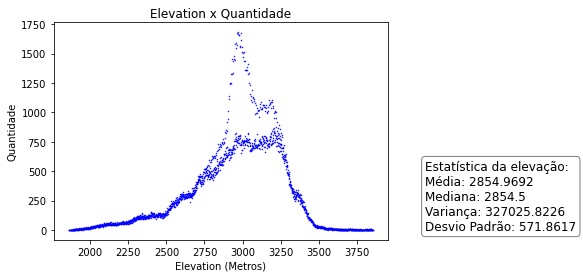

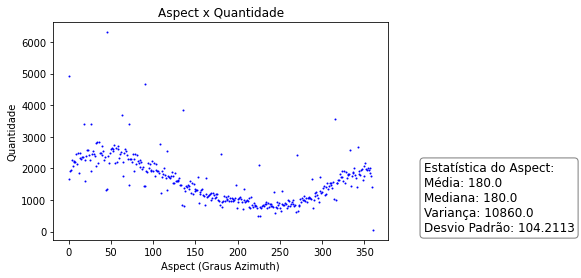

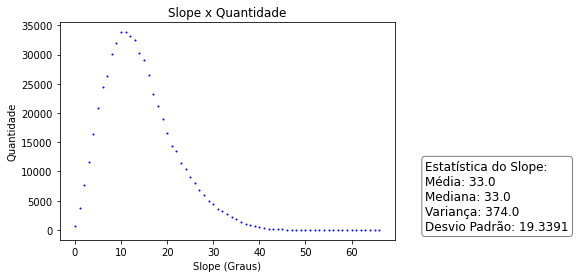

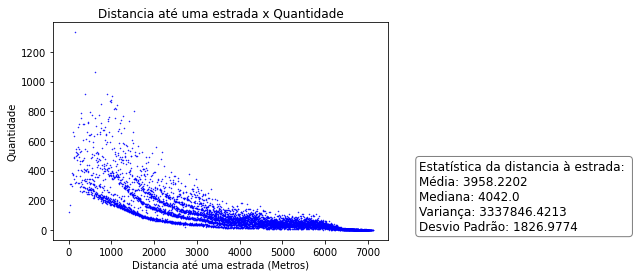

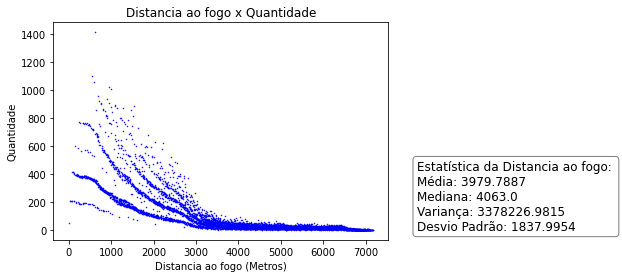

In [24]:
# Informações do dataframe.
# Ele conta quantas instâncias tem pra cada valor e pega eles
n_elevation = df.groupby(["Elevation"]).count().iloc[:, 0]
n_aspect = df.groupby(["Aspect"]).count().iloc[:, 0]
n_slope = df.groupby(["Slope"]).count().iloc[:, 0]
n_road = df.groupby(["Horizontal_Distance_To_Roadways"]).count().iloc[:, 0]
n_fire = df.groupby(["Horizontal_Distance_To_Fire_Points"]).count().iloc[:, 0]

# Style da caixa de texto
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Figura 1, Elevation
plt.figure(0)
plt.plot(n_elevation.index, n_elevation.values, color = "blue", linestyle = '', marker = 'o', markersize = '0.5')
plt.xlabel("Elevation (Metros)")
plt.ylabel("Quantidade")
plt.title("Elevation x Quantidade")
plt.text(4200, 0, 
         "Estatística da elevação: \n" +
         "Média: {} \n".format(round(np.mean(n_elevation.index), 4)) +
         "Mediana: {} \n".format(round(np.median(n_elevation.index), 4)) +
         "Variança: {} \n".format(round(np.var(n_elevation.index), 4)) +
         "Desvio Padrão: {}".format(round(np.std(n_elevation.index), 4)),
         bbox=props,
         fontsize = 12)

# Figura 2, Aspect
plt.figure(1)
plt.plot(n_aspect.index, n_aspect.values, color = "blue", linestyle = '', marker = 'o', markersize = '1')
plt.xlabel("Aspect (Graus Azimuth)")
plt.ylabel("Quantidade")
plt.title("Aspect x Quantidade")
plt.text(420, 0, 
         "Estatística do Aspect: \n" +
         "Média: {} \n".format(round(np.mean(n_aspect.index), 4)) +
         "Mediana: {} \n".format(round(np.median(n_aspect.index), 4)) +
         "Variança: {} \n".format(round(np.var(n_aspect.index), 4)) +
         "Desvio Padrão: {}".format(round(np.std(n_aspect.index), 4)),
         bbox=props,
         fontsize = 12)

plt.figure(2)
plt.plot(n_slope.index, n_slope.values, color = "blue", linestyle = '', marker = 'o', markersize = '1')
plt.xlabel("Slope (Graus)")
plt.ylabel("Quantidade")
plt.title("Slope x Quantidade")
plt.text(76, 0, 
         "Estatística do Slope: \n" +
         "Média: {} \n".format(round(np.mean(n_slope.index), 4)) +
         "Mediana: {} \n".format(round(np.median(n_slope.index), 4)) +
         "Variança: {} \n".format(round(np.var(n_slope.index), 4)) +
         "Desvio Padrão: {}".format(round(np.std(n_slope.index), 4)),
         bbox=props,
         fontsize = 12)

plt.figure(3)
plt.plot(n_road.index, n_road.values, color = "blue", linestyle = '', marker = 'o', markersize = '0.5')
plt.xlabel("Distancia até uma estrada (Metros)")
plt.ylabel("Quantidade")
plt.title("Distancia até uma estrada x Quantidade")
plt.text(8200, 0, 
         "Estatística da distancia à estrada: \n" +
         "Média: {} \n".format(round(np.mean(n_road.index), 4)) +
         "Mediana: {} \n".format(round(np.median(n_road.index), 4)) +
         "Variança: {} \n".format(round(np.var(n_road.index), 4)) +
         "Desvio Padrão: {}".format(round(np.std(n_road.index), 4)),
         bbox=props,
         fontsize = 12)

plt.figure(4)
plt.plot(n_fire.index, n_fire.values, color = "blue", linestyle = '', marker = 'o', markersize = '0.5')
plt.xlabel("Distancia ao fogo (Metros)")
plt.ylabel("Quantidade")
plt.title("Distancia ao fogo x Quantidade")
plt.text(8200, 0, 
         "Estatística da Distancia ao fogo: \n" +
         "Média: {} \n".format(round(np.mean(n_fire.index), 4)) +
         "Mediana: {} \n".format(round(np.median(n_fire.index), 4)) +
         "Variança: {} \n".format(round(np.var(n_fire.index), 4)) +
         "Desvio Padrão: {}".format(round(np.std(n_fire.index), 4)),
         bbox=props,
         fontsize = 12)

In [25]:
# Calculos estatisticos

# criacao do numpy array para auxiliar o calculo
HorizontalHidrografia = np.array(df["Horizontal_Distance_To_Hydrology"].values)
VerticalHidrografia = np.array(df["Vertical_Distance_To_Hydrology"].values)

# Ordenacao dos vetores
HorizontalHidrografia.sort()
VerticalHidrografia.sort()

# Calculo da media
mediaHorizontalHidrografia = round(np.mean(HorizontalHidrografia), 4)
mediaVerticalHidrografia = round(np.mean(VerticalHidrografia), 4)

# Calculo do desvio padrao
desvioHorizontalHidrografia = round(np.std(HorizontalHidrografia), 4)
desvioVerticalHidrografia = round(np.std(VerticalHidrografia), 4)

# Calculo da variancia
varianciaHorizontalHidrografia = round(np.var(HorizontalHidrografia), 4)
varianciaVerticalHidrografia = round(np.var(VerticalHidrografia), 4)

# Calculo da mediana
medianaHorizontalHidrografia = round(np.median(HorizontalHidrografia), 4)
medianaVerticalHidrografia = round(np.median(VerticalHidrografia), 4)


Text(-200, -36000, 'Estatística do Vertical_Distance_To_Hydrology: \nMédia: 46.4189 \nMediana: 30.0 \nVariança: 3398.3282 \nDesvio Padrão: 58.2952')

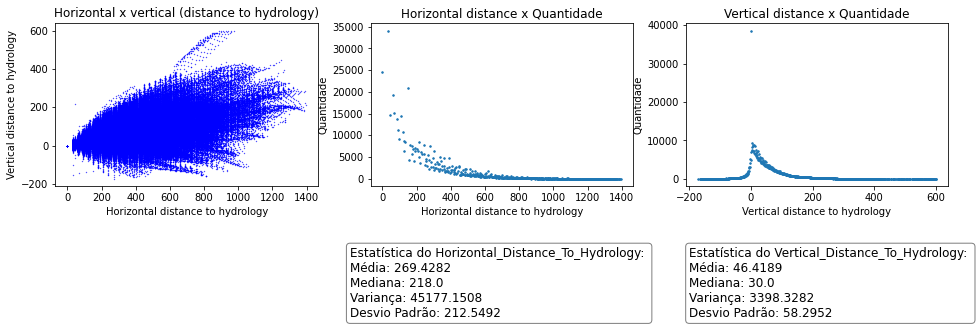

In [26]:
# Plot dos graficos para o atributo Distance_To_Hydrology (Vertical e Horizontal)

f_hydro = plt.figure(figsize=(16,3))

# Plot do grafico scatter para a distancia real (horizontal e vertical) para hidrografia
dfHidrografiaX = df["Horizontal_Distance_To_Hydrology"]
dfHidrografiaY = df["Vertical_Distance_To_Hydrology"]

bx1 = f_hydro.add_subplot(131)
bx2 = f_hydro.add_subplot(132)
bx3 = f_hydro.add_subplot(133)


bx1.set_title("Horizontal x vertical (distance to hydrology)")
bx1.set_xlabel("Horizontal distance to hydrology")
bx1.set_ylabel("Vertical distance to hydrology")
bx1.scatter(dfHidrografiaX, dfHidrografiaY, s=0.1, marker="o", c="blue", label = "Distancia para Hidrografia")

# Plot do grafico para a distancia horizontal para hidrografia

dfHidrografiaH = df.groupby(["Horizontal_Distance_To_Hydrology"]).count()
dfHidrografiaH = dfHidrografiaH["Elevation"]
x = dfHidrografiaH.index
y = dfHidrografiaH.values
bx2.set_title("Horizontal distance x Quantidade")
bx2.set_xlabel("Horizontal distance to hydrology")
bx2.set_ylabel("Quantidade")
bx2.plot(x, y,linestyle="", marker="o", markersize="1.5")

# Plot do grafico para a distancia Vertical para hidrografia

dfHidrografiaV = df.groupby(["Vertical_Distance_To_Hydrology"]).count()
dfHidrografiaV = dfHidrografiaV["Elevation"]
x = dfHidrografiaV.index
y = dfHidrografiaV.values
bx3.set_title("Vertical distance x Quantidade")
bx3.set_xlabel("Vertical distance to hydrology")
bx3.set_ylabel("Quantidade")
bx3.plot(x, y,linestyle="", marker="o", markersize="1.5")

# plt.rcParams["figure.figsize"] = (50, 16)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Plot dA legenda com os dados estatisticos
plt.text(-1300, -36000, 
         "Estatística do Horizontal_Distance_To_Hydrology: \n" +
         "Média: {} \n".format(mediaHorizontalHidrografia) +
         "Mediana: {} \n".format(medianaHorizontalHidrografia) +
         "Variança: {} \n".format(varianciaHorizontalHidrografia) +
         "Desvio Padrão: {}".format(desvioHorizontalHidrografia),
         bbox=props,
         fontsize = 12)

# Plot dA legenda com os dados estatisticos
plt.text(-200, -36000, 
         "Estatística do Vertical_Distance_To_Hydrology: \n" +
         "Média: {} \n".format(mediaVerticalHidrografia) +
         "Mediana: {} \n".format(medianaVerticalHidrografia) +
         "Variança: {} \n".format(varianciaVerticalHidrografia) +
         "Desvio Padrão: {}".format(desvioVerticalHidrografia),
         bbox=props,
         fontsize = 12)

Text(20, -7200, 'Estatística do Hillshade 3pm: \nMédia: 127.0 \nMediana: 127.0 \nVariança: 5418.6667 \nDesvio Padrão: 73.6116')

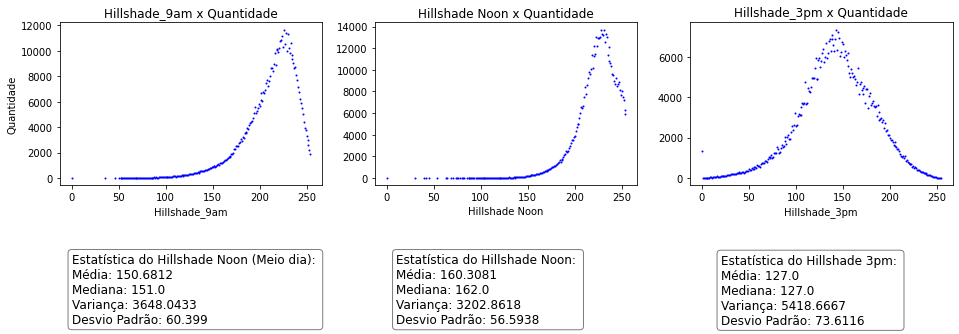

In [27]:
# Style da caixa de texto
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Informações do dataframe.
# Ele conta quantas instâncias tem pra cada valor e pega eles
n_hillshade9 = df.groupby(["Hillshade_9am"]).count().iloc[:, 0]
n_hillshade12 = df.groupby(["Hillshade_Noon"]).count().iloc[:, 0]
n_hillshade3 = df.groupby(["Hillshade_3pm"]).count().iloc[:, 0]

# Tamanho do gráfico
f = plt.figure(figsize=(16,3))

# Dividir em subplots
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

# Gráfico 1, Hillshade 9 am
ax1.plot(n_hillshade9.index, n_hillshade9.values, color = "blue", linestyle = '', marker = 'o', markersize = '1')
ax1.set_xlabel("Hillshade_9am")
ax1.set_ylabel("Quantidade")
ax1.set_title("Hillshade_9am x Quantidade")
ax1.text(0, -11400, 
         "Estatística do Hillshade Noon (Meio dia): \n" +
         "Média: {} \n".format(round(np.mean(n_hillshade9.index), 4)) +
         "Mediana: {} \n".format(round(np.median(n_hillshade9.index), 4)) +
         "Variança: {} \n".format(round(np.var(n_hillshade9.index), 4)) +
         "Desvio Padrão: {}".format(round(np.std(n_hillshade9.index), 4)),
         bbox=props,
         fontsize = 12)

# Gráfico 2, Hillshade Noon / Meio dia
ax2.plot(n_hillshade12.index, n_hillshade12.values, color = "blue", linestyle = '', marker = 'o', markersize = '1')
ax2.set_xlabel("Hillshade Noon")
ax2.set_title("Hillshade Noon x Quantidade")
ax2.text(10, -13400, 
         "Estatística do Hillshade Noon: \n" +
         "Média: {} \n".format(round(np.mean(n_hillshade12.index), 4)) +
         "Mediana: {} \n".format(round(np.median(n_hillshade12.index), 4)) +
         "Variança: {} \n".format(round(np.var(n_hillshade12.index), 4)) +
         "Desvio Padrão: {}".format(round(np.std(n_hillshade12.index), 4)),
         bbox=props,
         fontsize = 12)

# Gráfico 3, Hillshade 3pm
ax3.plot(n_hillshade3.index, n_hillshade3.values, color = "blue", linestyle = '', marker = 'o', markersize = '1')
ax3.set_xlabel("Hillshade_3pm")
ax3.set_title("Hillshade_3pm x Quantidade")
ax3.text(20, -7200, 
         "Estatística do Hillshade 3pm: \n" +
         "Média: {} \n".format(round(np.mean(n_hillshade3.index), 4)) +
         "Mediana: {} \n".format(round(np.median(n_hillshade3.index), 4)) +
         "Variança: {} \n".format(round(np.var(n_hillshade3.index), 4)) +
         "Desvio Padrão: {}".format(round(np.std(n_hillshade3.index), 4)),
         bbox=props,
         fontsize = 12)

<BarContainer object of 4 artists>

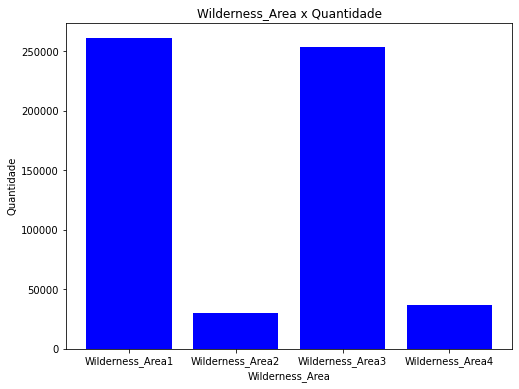

In [28]:
quantidadeWildernessArea = []                                                 # Criacao do vetor para armazenar as frequencias de cada Wilderness Area
WildernessAreaName = []                                                       # Criacao do vetor para armazenar os nomes de cada Wilderness Area

for i in range(4):                                                            # loop para determinar a frequencia de cada Wilderness Area
  WildernessAreaName.append("Wilderness_Area"+str(i+1))
  WildernessArea = df.groupby(["Wilderness_Area"+str(i+1)]).count()
  WildernessArea = WildernessArea["Elevation"]
  quantidadeWildernessArea.append(WildernessArea[1])

f, ax = plt.subplots(figsize=(8,6))                                          # Tamanho da imagem
    
plt.title("Wilderness_Area x Quantidade")                                     # Plot do grafico de barras
plt.xlabel("Wilderness_Area")
plt.ylabel("Quantidade")
plt.bar(WildernessAreaName, quantidadeWildernessArea, color = "blue")

<BarContainer object of 40 artists>

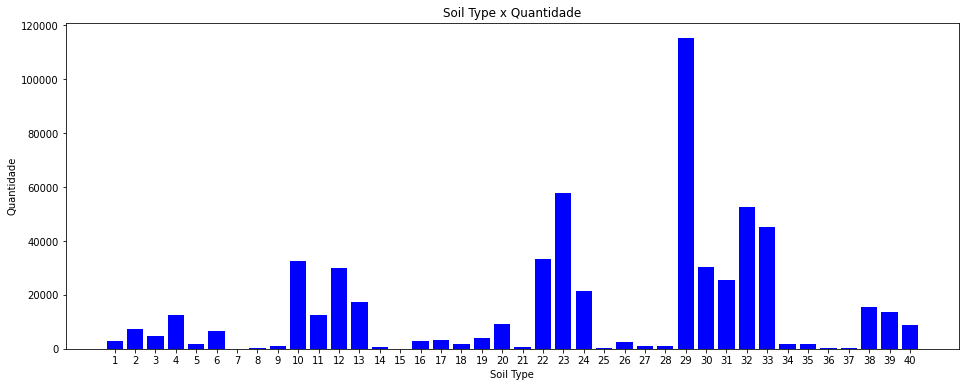

In [29]:
quantidadeSoilType = []                                     # Criacao do vetor para armazenar as frequencias de cada soil type
soilTypeName = []                                           # Criacao do vetor para armazenar os nomes de cada soil type

for i in range(40):                                         # loop para determinar a frequencia de cada tipo de solo
  soilTypeName.append(str(i+1))
  soilType = df.groupby(["Soil_Type"+str(i+1)]).count()
  soilType = soilType["Elevation"]
  quantidadeSoilType.append(soilType[1])

f, ax = plt.subplots(figsize=(16,6))                         # Tamanho da imagem
    
plt.title("Soil Type x Quantidade")                          # Plot do grafico de barras
plt.xlabel("Soil Type")
plt.ylabel("Quantidade")
plt.bar(soilTypeName, quantidadeSoilType,  color="blue")

### 2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
Pode-se dizer que a distribuição de *cover_type*, que é o atributo alvo desse *DataFrame*, é bem **desbalanceado** por conta de seus atributos preditores serem **desbalanceados** valendo citar que os mairoes desbalanceamentos escontram-se nos atributos `SoilType` e `Wilderness_Area`.  

Pelo gráfico acima, é possível perceber que existem muito mais exemplos dos *soil_type* 29, 23, 32 e 33, e as demais quantidades de *soil_type* é significantemente menor.  

Portanto, pode-se falar que os atributos tendem para esses tipos(29, 23, 32 e 33).

### 3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?

Como o proprio dataset indica, este é um problema de classificacao.  

Sendo assim, um algoritmo de classificacao multiclasse é adequado para o problema, sendo eles: Árvores de Decisão, Classificação Naïve Bayes, Regressão Linear de Mínimos Quadrados, Regressão logística, Support Vector Machine.  

Dentre esse algoritmos, a equipe escolheu o algoritmo de classificação Naïve Bayes que usa probabilidades para o cálculo 
 P (A| B) = ( P (B|A) * P (A) ) / P (B) que serve para predizer um problema relativamente similar ao atual que é o de Classificar um artigo de notícias sobre tecnologia, política ou esportes.

### 3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)

Existem 4 métricas para medir o desempenho do problema de classificação.  

As 4 métricas seguem a tabela da **matriz de confusão**, que se consegue depois da máquina ter sido treinada e testada.  

A matriz de confusão descreve se as respostas positivas e negativas são válidas ou não, ela pode ser traduzida para uma matriz de 3 classes ou mais, mas a matriz abaixo é a binária, apenas para explicar.

| Matriz de Confusão | Verdadeiro | Falso |
| :- | :- | :-: |
| Positivo | Verdadeiro Positivo | Falso Positivo |
| Negativo | Verdadeiro Negativo | Falso Negativo |

Essas 4 métricas são:  

1. **Acurária**  

A acurácia é, dentre o **Verdadeiro positivo e verdadeiro negativo**, os acertos divididos pela quantidade total.  

$Precisao = \frac{VP + VN}{Total}$

Com isso, a acurácia indica se houve uma boa quantidade de respostas válidas do total.


2. **Precisão**  

A precisão é, dentre o **Verdadeiro positivo e falso positivo**, a quantidade de positivos divididos pela quantidade total.

$Precisao = \frac{VP}{VP + FP}$

A precisão indica a porcentagem de respostas válidas dentro das respostas positivas.

3. **Recall**  

O recall é, dentre o **Verdadeiro positivo e falso negativo**, a quantidade de positivos divido pela soma dos dois.

$Precisao = \frac{VP}{VP + FN}$

O recall indica acertos válidos preditos pelo modelo, a porcentagem de respostas corretas.


4. **F1 Score**  

Já o F1 Score é um pouco diferente.  

Ao invés de se basear na matriz de confusão, o F1Score é a média harmônica entre a precisão e o Recall.  
Ele é usado para indicar como está o estado do modelo, em conjunto com a acurácia.

A acurária é usado para indicar a quantidade de acertos.
Porém, o F1Score indica quais os impactos dos falsos positivos e falsos negativos dentro domodelo.



### 3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe
Com relação as métricas de avaliação de modelos, pode-se dizer que para essa base de dados não seria indicado usar a **acurácia** pois os dados não se encontram igualmente dispersos entre si.  

A técnica de **precisão** também não é muito indicada, pois ela leva em consideração os falsos positivos pois trata-se de classificar um resultado de maneira precisa, sendo assim a principal utilização dessa métrica é para modelos onde é preciso minimizar os falsos positivos.  

A técnica **recall** é usada para obter os acertos do modelo, ou seja os falsos negativos e os verdadeiros positivos, sendo assim essa métrica por si só não é diretamente vinculada a classificar todos os casos corretamente.  

Com isso a equipe resolveu escolher a métrica de avaliação **F1 Score** pois embora seja a menos intuitiva ela é capaz de combinar as métricas precisão e recall e também, no geral, essa metrica é melhor que acurácia principalmente onde falsos positivos e falsos negativos possuem impactos diferentes em um modelo.